<IPython.core.display.Javascript object>


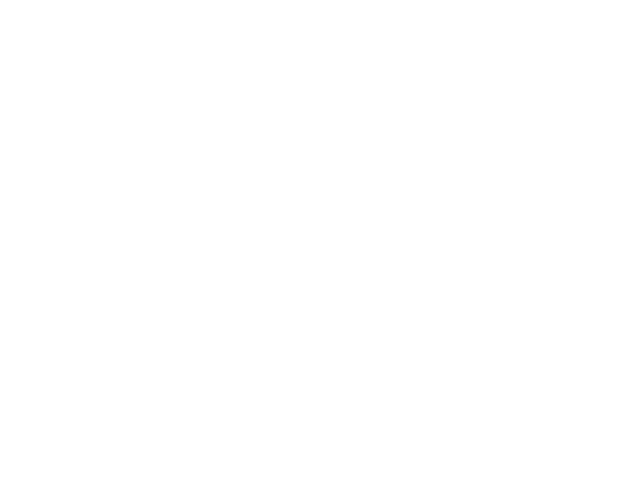

In [2]:
from pyclustering.cluster.bsas import bsas, bsas_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
%matplotlib notebook

sample = read_sample(SIMPLE_SAMPLES.SAMPLE_SIMPLE2)

max_clusters = 3
threshold = 2

bsas_instance = bsas(sample, max_clusters, threshold)
bsas_instance.process()
clusters = bsas_instance.get_clusters()
representatives = bsas_instance.get_representatives()
sample = np.array(sample)
cls = []
bnd = []
for cluster in clusters:
    sum=np.array([0, 0], dtype=np.float32)
    pts=[]
    for i in cluster:
        pts.append(list(sample[i]))
        sum+=sample[i]
    cls_pts = np.vstack((pts[np.where(np.array(pts)[:, 0] == np.max(np.array(pts)[:, 0]))[0][0]],
    pts[np.where(np.array(pts)[:, 0] == np.min(np.array(pts)[:, 0]))[0][0]],
    pts[np.where(np.array(pts)[:, 1] == np.max(np.array(pts)[:, 1]))[0][0]],
    pts[np.where(np.array(pts)[:, 1] == np.min(np.array(pts)[:, 1]))[0][0]]))
    bnd.append([np.min(cls_pts[:, 0]), np.min(cls_pts[:, 1]),
     np.max(cls_pts[:, 0]) - np.min(cls_pts[:, 0]),
     np.max(cls_pts[:, 1]) - np.min(cls_pts[:, 1])])
    sum = sum/len(cluster)
    cls.append(sum)
cls = np.array(cls).reshape(-1, 2)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
plt.scatter(np.array(sample).reshape(-1, 2)[:, 0],
            np.array(sample).reshape(-1, 2)[:, 1])
plt.scatter(np.array(cls).reshape(-1, 2)[:, 0],
            np.array(cls).reshape(-1, 2)[:, 1], c='red')
for i in range(len(cls)):
    ax.add_patch(patches.Rectangle(
                 (bnd[i][0], bnd[i][1]),
                  bnd[i][2], bnd[i][3],
                  fill=False))
plt.show()

<IPython.core.display.Javascript object>


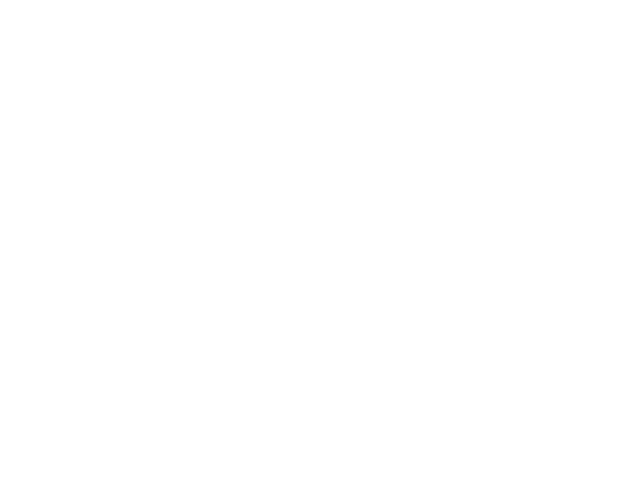

NameError: name 'wwd' is not defined

In [1]:
from pyclustering.cluster.bsas import bsas, bsas_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
%matplotlib notebook

img = cv2.imread('/home/hamed/Seperate.png')
img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,img_thresh = cv2.threshold(img_gray,210,255,cv2.THRESH_BINARY)
nonzro_samples = cv2.findNonZero().reshape(-1, 2)

max_clusters = 3
threshold = 20

bsas_instance = bsas(sample, max_clusters, threshold)
bsas_instance.process()
clusters = bsas_instance.get_clusters()
representatives = bsas_instance.get_representatives()
cls = []
bnd = []
for cluster in clusters:
    sum=np.array([0, 0], dtype=np.float32)
    pts=[]
    for i in cluster:
        pts.append(list(sample[i]))
        sum+=sample[i]
    cls_pts = np.vstack((pts[np.where(np.array(pts)[:, 0] == np.max(np.array(pts)[:, 0]))[0][0]],
    pts[np.where(np.array(pts)[:, 0] == np.min(np.array(pts)[:, 0]))[0][0]],
    pts[np.where(np.array(pts)[:, 1] == np.max(np.array(pts)[:, 1]))[0][0]],
    pts[np.where(np.array(pts)[:, 1] == np.min(np.array(pts)[:, 1]))[0][0]]))
    bnd.append([np.min(cls_pts[:, 0]), np.min(cls_pts[:, 1]),
     np.max(cls_pts[:, 0]) - np.min(cls_pts[:, 0]),
     np.max(cls_pts[:, 1]) - np.min(cls_pts[:, 1])])
    sum = sum/len(cluster)
    cls.append(sum)
cls = np.array(cls).reshape(-1, 2)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
plt.scatter(np.array(sample).reshape(-1, 2)[:, 0],
            np.array(sample).reshape(-1, 2)[:, 1])
plt.scatter(np.array(cls).reshape(-1, 2)[:, 0],
            np.array(cls).reshape(-1, 2)[:, 1], c='red')
for i in range(len(cls)):
    ax.add_patch(patches.Rectangle(
                 (bnd[i][0], bnd[i][1]),
                  bnd[i][2], bnd[i][3],
                  fill=False))
plt.show()
roi = cv2.cvtColor(img[bnd[1][1]:bnd[1][1]+bnd[1][3], bnd[1][0]:bnd[1][0]+bnd[1][2]], cv2.COLOR_BGR2GRAY)

print(len(cv2.findNonZero(roi)), roi.shape[0]*roi.shape[1])

Found 4 Circles


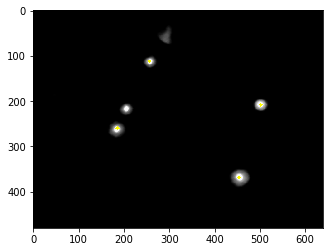

In [23]:
img = cv2.imread('/home/hamed/catkin_ws/src/aras_robotics/scripts/Marker_Extraction/image.jpg', 0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,10,
                            param1=60,param2=20,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))
print("Found " + str(len(circles[0])) + " Circles")
for i in circles[0,:]:
    cv2.circle(cimg,(i[0],i[1]),2,(255,255,0),4)
fig = plt.figure()
plt.imshow(cimg)
plt.show()

<IPython.core.display.Javascript object>


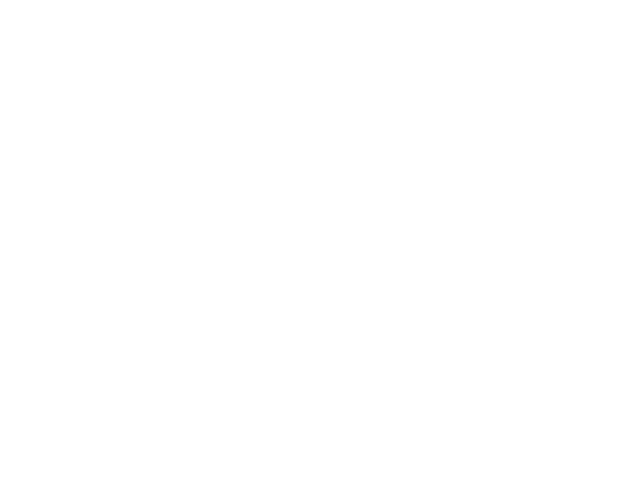

[[189, 263, 13, 11], [263, 345, 6, 7]]


In [1]:
from pyclustering.cluster.bsas import bsas, bsas_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
%matplotlib notebook

img = cv2.imread('/home/hamed/merged.png')
ret,img = cv2.threshold(img,50,255,cv2.THRESH_BINARY)
sample = cv2.findNonZero(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)).reshape(-1, 2)

max_clusters = 2
threshold = 20

bsas_instance = bsas(sample, max_clusters, threshold)
bsas_instance.process()
clusters = bsas_instance.get_clusters()
representatives = bsas_instance.get_representatives()
cls = []
bnd = []
for cluster in clusters:
    sum=np.array([0, 0], dtype=np.float32)
    pts=[]
    for i in cluster:
        pts.append(list(sample[i]))
        sum+=sample[i]
    cls_pts = np.vstack((pts[np.where(np.array(pts)[:, 0] == np.max(np.array(pts)[:, 0]))[0][0]],
    pts[np.where(np.array(pts)[:, 0] == np.min(np.array(pts)[:, 0]))[0][0]],
    pts[np.where(np.array(pts)[:, 1] == np.max(np.array(pts)[:, 1]))[0][0]],
    pts[np.where(np.array(pts)[:, 1] == np.min(np.array(pts)[:, 1]))[0][0]]))
    bnd.append([np.min(cls_pts[:, 0]), np.min(cls_pts[:, 1]),
     np.max(cls_pts[:, 0]) - np.min(cls_pts[:, 0]),
     np.max(cls_pts[:, 1]) - np.min(cls_pts[:, 1])])
    sum = sum/len(cluster)
    cls.append(sum)
cls = np.array(cls).reshape(-1, 2)
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
plt.scatter(np.array(sample).reshape(-1, 2)[:, 0],
            np.array(sample).reshape(-1, 2)[:, 1])
plt.scatter(np.array(cls).reshape(-1, 2)[:, 0],
            np.array(cls).reshape(-1, 2)[:, 1], c='red')
for i in range(len(cls)):
    ax.add_patch(patches.Rectangle(
                 (bnd[i][0], bnd[i][1]),
                  bnd[i][2], bnd[i][3],
                  fill=False))
print(bnd)

In [82]:
frame = cv2.imread('/home/hamed/catkin_ws/src/aras_robotics/scripts/Marker_Extraction/image.jpg', 0)
ret,img = cv2.threshold(cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR),230,255,cv2.THRESH_BINARY)
sample = cv2.findNonZero(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)).reshape(-1, 2)
bsas_instance = bsas(sample, 5, 20)
bsas_instance.process()
clusters = bsas_instance.get_clusters()
representatives = bsas_instance.get_representatives()
cls=[]
bnd=[]
print(clusters)
for cluster in clusters:
    sum=np.array([0, 0], dtype=np.float32)
    pts=[]
    for i in cluster:
        pts.append(list(sample[i]))
        sum+=sample[i]
    cls_pts = np.vstack((pts[np.where(np.array(pts)[:, 0] == np.max(np.array(pts)[:, 0]))[0][0]],
                         pts[np.where(np.array(pts)[:, 0] == np.min(np.array(pts)[:, 0]))[0][0]],
                         pts[np.where(np.array(pts)[:, 1] == np.max(np.array(pts)[:, 1]))[0][0]],
                         pts[np.where(np.array(pts)[:, 1] == np.min(np.array(pts)[:, 1]))[0][0]]))
    bnd.append([np.min(cls_pts[:, 0]), np.min(cls_pts[:, 1]),
                np.max(cls_pts[:, 0]) - np.min(cls_pts[:, 0]),
                np.max(cls_pts[:, 1]) - np.min(cls_pts[:, 1])])
print(len(bnd))

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27], [28, 29, 30, 31, 32, 37, 38, 39, 40, 41, 42, 43, 48, 49, 50, 51, 52, 53, 54, 60, 61, 62, 63, 64, 65, 66, 72, 73, 74, 75, 76, 77, 78, 79, 86, 87, 88, 89, 90, 91, 92, 97, 98, 99, 100, 101], [33, 34, 35, 36, 44, 45, 46, 47, 55, 56, 57, 58, 59, 67, 68, 69, 70, 71, 80, 81, 82, 83, 84, 85, 93, 94, 95, 96], [102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130], [131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179]]
5


(20, 20)


[[9.5, 10.5]]

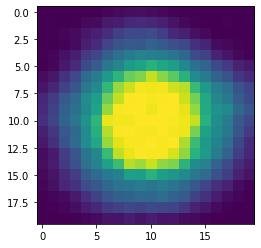

In [92]:
i=4
img = frame.copy()[(bnd[i][1]-6):bnd[i][1]+bnd[i][3]+6, bnd[i][0]-6:(bnd[i][0]+6+bnd[i][2])]
plt.imshow(img)
print(img.shape)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,10,
                        param1=5,param2=3,minRadius=0,maxRadius=15)
cls=[]
for i in circles[0,:]:
            cls.append([i[0], i[1]])
cls

<IPython.core.display.Javascript object>


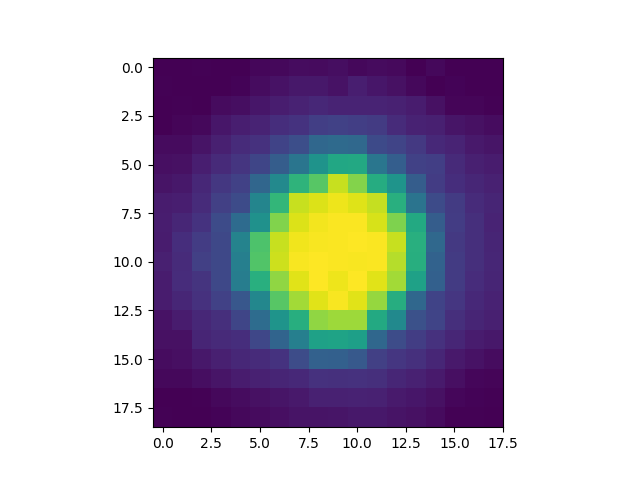

[[8, 10]]

In [11]:
frame = cv2.imread('deb.jpg', 0)
plt.imshow(frame)
circles = cv2.HoughCircles(frame,cv2.HOUGH_GRADIENT,1,10,
                        param1=25,param2=5,minRadius=0,maxRadius=15)
circles = np.uint16(np.around(circles))
cls=[]
for i in circles[0,:]:
            cls.append([i[0], i[1]])
cls

In [18]:
from pyclustering.cluster.bsas import bsas, bsas_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
%matplotlib notebook

params = cv2.SimpleBlobDetector_Params()
params.minThreshold = 0;
params.maxThreshold = 150;
params.filterByArea = True
params.minArea = 0
params.filterByCircularity = True
params.minCircularity = 0.1
params.filterByConvexity = True
params.minConvexity = 0.5
params.filterByInertia = True
params.minInertiaRatio = 0.1
params.blobColor = 255
 
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)

frame = cv2.imread('deb.jpg', 0)
keypoints = detector.detect(frame)
keypoints

[<KeyPoint 0x7ff0d66aded0>]

(6.25, 7.25)

<IPython.core.display.Javascript object>


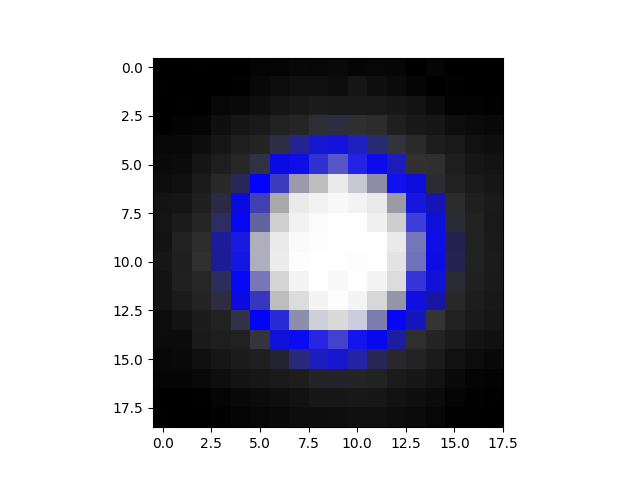

In [19]:
im_with_keypoints = cv2.drawKeypoints(frame, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(im_with_keypoints)
plt.show()